# Sentiment Analysis on Anime Reviews 

## 0. Introduction 
### 0.1 Import Libraries
### 0.2 Loading the Database 

## 1. Exploratory Data Analysis 
### 1.1. Data Exploration 
### 1.2. Data Split
### 1.3. Data Cleaning 



## 0. Introduction 

A Japanese anime, from Chinese viewing website called bilibili.com, which went IPO in NY Exchange as ticker (BILI). The reviews are scrapped from the website using JSON and till the end of the date of May 6, 2019. 

* Question: 
* Source: 
* Conclusion: 

### 0.1 Import Libraries 

In [1]:
import os 
import sys 
import re

import scipy
import numpy as np
import pandas as pd
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# import sklearn modules 
import sklearn.metrics as skm
import sklearn.model_selection
import sklearn.preprocessing
from sklearn.metrics import confusion_matrix as skm_conf_mat

### 0.2 Loading the Dataset

In [7]:
original_df = pd.read_pickle("/Users/apple/Desktop/ADEC7430 BIg Data Econometrics/Final/gzxb.pkl")
datas = pd.read_csv("/Users/apple/Desktop/ADEC7430 BIg Data Econometrics/Final/bilibilib_gongzuoxibao.csv", sep = ",")

## 1. Exploratory Data Analysis 
### 1.1. Data Exploration 

In [8]:
colnames = datas.columns
print(colnames) # author, score, disliked, likes, liked, ctime, score.1, content, last_ex_index, cursor, date

Index(['author', 'score', 'disliked', 'likes', 'liked', 'ctime', 'content',
       'last_ep_index', 'cursor', 'date'],
      dtype='object')


In [9]:
datas.shape

(19063, 10)

In [10]:
del datas['ctime']
del datas['cursor']
del datas['liked']
del datas['disliked']
del datas['likes']
del datas['last_ep_index']
pd.isnull(datas).astype(int).aggregate(sum, axis = 0)

author     0
score      0
content    0
date       0
dtype: int64

!!! Generate a line chart to show the frequency of ratings 

In [12]:
from pyecharts.charts import Pie,Line,Scatter

chart = Line("评论数时间分布")
chart.use_theme('dark')
chart.add( '评论数时间分布',num_date.index, num_date.values, is_fill=True, line_opacity=0.2,
          area_opacity=0.4, symbol=None)

chart.render('评论时间分布.html')

# OR 
datascore = datas.score.groupby(datas.dates).mean()
chart = Line("评分时间分布")
chart.use_theme('dark')
chart.add('评分', datascore.index, 
          datascore.values, 
          line_width = 2            
          )
chart.render('评分时间分布.html')

ModuleNotFoundError: No module named 'pyecharts'

In [13]:
content_df = datas['content']
content_df.to_pickle("/Users/apple/Desktop/ADEC7430 BIg Data Econometrics/Final/gzxb.pkl")

### 1.2. Data Split

In [14]:
content_df.describe()

count     19063
unique    16231
top          好看
freq        316
Name: content, dtype: object

In [15]:
# split the train data into train1 (for modeling) and train2 (for testing, out of sample accuracy measures)
import random
random.seed(2019)
randommask = [x < 0.5 for x in [random.uniform(0,1) for y in range(content_df.shape[0])]]

train1 = content_df.loc[randommask].copy()
train2 = content_df.loc[[not x for x in randommask]].copy()
randommask = [x < 0.7 for x in [random.uniform(0,1) for y in range(train1.shape[0])]]
train3 = train1.loc[randommask].copy()
train4 = train1.loc[[not x for x in randommask]].copy()

rTrain = train3
rTest = train4
TEST = train2

# let's understand up a bit the data
rTrain.shape

(6553,)

In [16]:
rTrain.head(10)

12    题材新颖    剧情也不错    作画也很好    最重要的是声优阵容豪华
15                                 希望有第二季！！
19                              是我在b站看过最好的番
20                           很棒！狗粮真好吃真好吃！！！
25                          让我了解到了很多生活方面的知识
31                              好看好看~大爱工作细胞
33                                 很有意思 很可爱
36                                  买了白哥手办！
37                                       。。
43                小时候最喜欢生物，虽然学不了，但我还是想一直关注她
Name: content, dtype: object

In [17]:
#%%评论分析
texts = ';'.join(content_df.tolist())
cut_text = " ".join(jieba.cut(texts))
# TF_IDF
keywords = jieba.analyse.extract_tags(cut_text, topK=100, withWeight=True, allowPOS=('a','e','n','nr','ns'))
text_cloud = dict(keywords)
pd.DataFrame(keywords).to_excel('TF_IDF关键词前100.xlsx')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4h/8s1vtfjn6q96ftrjbs27q_k40000gn/T/jieba.cache
Loading model cost 1.195 seconds.
Prefix dict has been built succesfully.


In [18]:
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [19]:
# Remove all punctuation and expression marks 
temp =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"
cut_text = re.sub(pattern = temp, repl = "", string = cut_text)

Can we draw a wordcloud someway? 

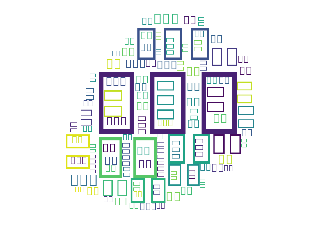

In [20]:
bg = plt.imread("血小板.jpg")
# 生成
wc = WordCloud(# FFFAE3
    background_color="white",  # 设置背景为白色，默认为黑色
    width=400,  # 设置图片的宽度
    height=600,  # 设置图片的高度
    mask=bg,
    random_state = 2,
    max_font_size=500,  # 显示的最大的字体大小
    #font_path="STSONG.TTF",  
).generate_from_frequencies(text_cloud)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [22]:
text_cloud

{'血小板': 1.011030649143305,
 '细胞': 0.3480991033952349,
 '啊啊啊': 0.18797358827983712,
 '动漫': 0.1664184460608045,
 '身体': 0.16547942087465203,
 '有趣': 0.1600907823444498,
 '生物': 0.15913990216741578,
 '不错': 0.13697913398554687,
 '很棒': 0.12639950302462877,
 '剧情': 0.1139274898252161,
 '动画': 0.11105580756008976,
 '白细胞': 0.1080316828669282,
 '番剧': 0.10366362556537288,
 '感觉': 0.08486598822848321,
 '赛高': 0.08279842297553745,
 '红细胞': 0.07892628937703236,
 '香菜': 0.0765515923686835,
 '白血球': 0.06469304157432958,
 '新颖': 0.05485513020202793,
 '超棒': 0.05265979701244182,
 '老婆': 0.05206180119117907,
 '题材': 0.049581531436182956,
 '陪伴': 0.04802495129486591,
 '脑洞': 0.048023085325811725,
 '画风': 0.04311744655214761,
 '漫画': 0.04235598208994765,
 '意义': 0.04188755503663564,
 '拟人化': 0.04118278708324469,
 '硬核': 0.04098081263289007,
 '医学生': 0.04078672198524768,
 '声优': 0.03941204933635583,
 '作品': 0.038939896414051975,
 '生物课': 0.037687711617747116,
 '有点': 0.037378580938638634,
 '卡哇伊': 0.03658478437887855,
 '太棒了': 0.0339

## Note: 
Test data is split half (train/test) and then 70-30, containing 6553 comments. 